<h1 align=center>机器学习 决策树</h1>

导入指定库:
<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>DecisionTreeClassifier</b> from <b>sklearn.tree</b> </li>
</ul>

In [37]:
import numpy as np 
import pandas 
from sklearn.tree import DecisionTreeClassifier

from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


skulls.csv数据集，包括来自5个不同年代的埃及头骨的测量数据.

<b>epoch</b> - 头骨的年代，分为4000BC，3300BC，1850BC，200BC和AD150等不同的年代。这些年份这是大约估算的。

<b>mb</b> - 头骨最大宽度.

<b>bh</b> - 头顶到颅底的高度.

<b>bl</b> - 下颚到颅底的长度.

<b>nh</b> - 鼻骨的高度.

---

In [38]:
my_data = pandas.read_csv("skulls.csv", delimiter=",")

In [39]:
my_data

,Unnamed: 0,epoch,mb,bh,bl,nh
0,1,c4000BC,131,138,89,49
1,2,c4000BC,125,131,92,48
2,3,c4000BC,131,132,99,50
3,4,c4000BC,119,132,96,44
4,5,c4000BC,136,143,100,54
...,...,...,...,...,...,...
145,146,cAD150,137,125,85,57
146,147,cAD150,129,128,81,52
147,148,cAD150,140,135,103,48
148,149,cAD150,147,129,87,48


用<b>my_data</b>读取来自skulls.csv的数据。声明以下变量
<ul>
    <li>  X 作为 特征矩阵 (就是my_data的数据) </li>
    <li>  Y 作为 响应向量 (目标) </li>
    <li> targetNames 作为 响应向量名称列表(目标名称)</li>
    <li> featureNames 作为 特征矩阵列名称列表 </li>   
</ul>

获得数据集的属性名列表

In [40]:
featureNames = list(my_data.columns.values)[2:6]
featureNames

['mb', 'bh', 'bl', 'nh']

清洗数据集，将数据集中不包含数值的目标列和表示序号的列删除

In [41]:
# Remove the column containing the target name since it doesn't contain numeric values.
# axis=1 means we are removing columns instead of rows.
X = my_data.drop(my_data.columns[[0,1]], axis=1).values
X[0:5]

array([[131, 138,  89,  49],
       [125, 131,  92,  48],
       [131, 132,  99,  50],
       [119, 132,  96,  44],
       [136, 143, 100,  54]])

列出不同的年代

In [42]:
targetNames = my_data["epoch"].unique().tolist()
targetNames

['c4000BC', 'c3300BC', 'c1850BC', 'c200BC', 'cAD150']

将年代值放入目标向量Y中

In [43]:
y = my_data["epoch"]
y[0:5]

0    c4000BC
1    c4000BC
2    c4000BC
3    c4000BC
4    c4000BC
Name: epoch, dtype: object

---
## 设置决策树
我们将从原始数据中分离出训练和测试数据。为此，我们需要借助sklearn.cross_validation的train_test_split方法

In [44]:
from sklearn.model_selection import train_test_split

<b> train_test_split </b> 会返回四个参数，我们将它们命名为:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
<b> train_test_split </b>需要如下参数: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
<b>X</b> 和 <b>y</b>表示分离之前的数据集，<b>test_size</b>表示测试数据的占比，<b>random_state</b>保证我们每次调用得到相同的分离结果。

In [45]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

输出X_trainset和 y_trainset的结构，确保维度相匹配。

In [46]:
#python2 print X_trainset.shape 
#python2 print y_trainset.shape
print (X_trainset.shape) 
print (y_trainset.shape)

(105, 4)
(105,)


输出X_testset 和 y_testset的结构，确保维度相匹配。

In [47]:
#python2 print X_testset.shape 
#python2 print y_testset.shape
print (X_testset.shape) 
print (y_testset.shape)

(45, 4)
(45,)


我们将先创建DecisionTreeClassifier（决策树分类器）的实例，赋值给skullsTree。

我们设置<i> criterion="entropy" </i>，这样能够得到每个节点的信息。

In [48]:
skullsTree = DecisionTreeClassifier(criterion="entropy")

现在我们用训练数据集 X_trainset 和 y_trainset 来进行训练。

In [49]:
skullsTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy')

训练完成的模型针对测试数据集X_testset进行预测

In [50]:
predTree = skullsTree.predict(X_testset)

如果想要对预测值和实际值做比较，那么可以打印出 <b>predTree</b> 和 <b>y_testset</b>

In [51]:
print(predTree [0:5])
print(y_testset [0:5])

['c4000BC' 'c4000BC' 'c1850BC' 'cAD150' 'c200BC']
47    c3300BC
3     c4000BC
31    c3300BC
25    c4000BC
15    c4000BC
Name: epoch, dtype: object


接下来，从sklearn中导入metrics，检查我们的模型的准确性 

In [52]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: "), metrics.accuracy_score(y_testset, predTree)

DecisionTrees's Accuracy: 


(None, 0.2)

然后，我们可以可视化生成的决策树

In [53]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

# for graphviz on windows
#import os     
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'


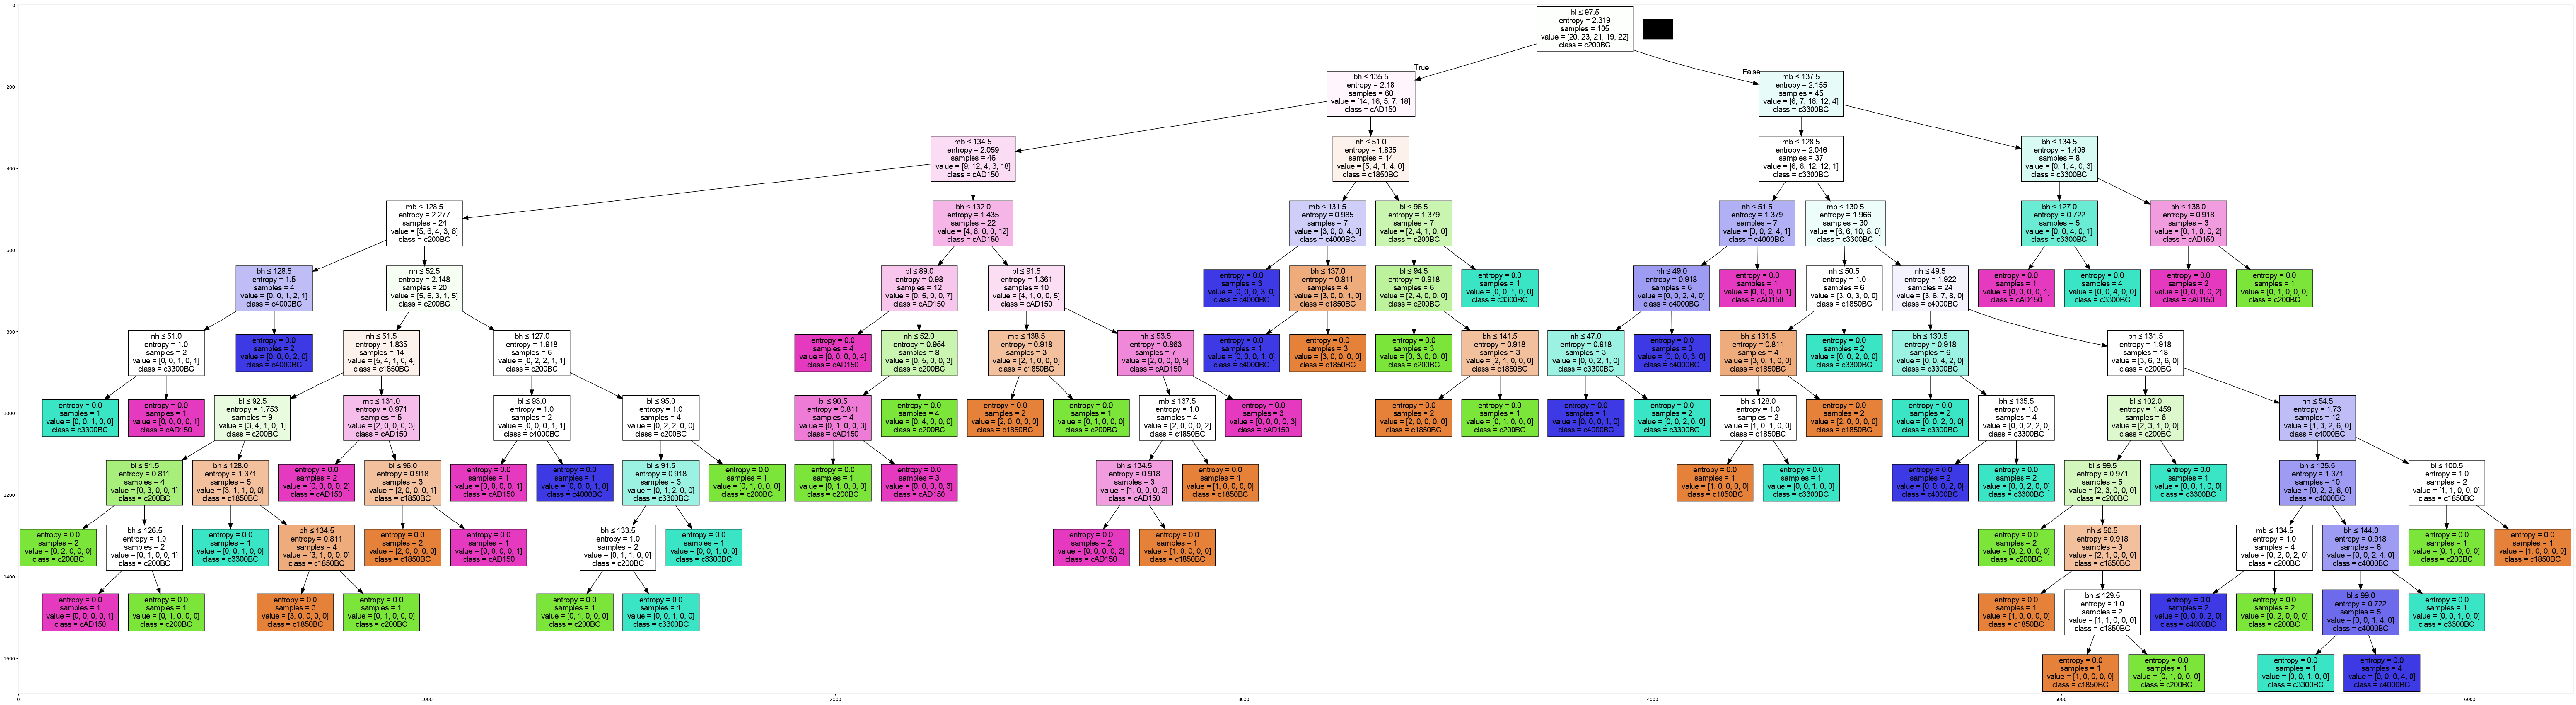

In [54]:
dot_data = StringIO()
filename = "skulltree.png"
out=tree.export_graphviz(skullsTree,feature_names=featureNames, out_file=dot_data, \
                         class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')